## An Overfitting Example: Polynomial Curve Fitting

Degree= 1 , coefficients= [0.00561353]
Degree= 3 , coefficients= [-3.31414621  3.54348351 -0.2477534 ]
Degree= 9 , coefficients= [-1.81086472e+01  8.47839349e+02 -8.84665245e+03  3.87894086e+04
 -8.60154369e+04  1.00807536e+05 -5.81628470e+04  1.12969102e+04
  1.30126020e+03]


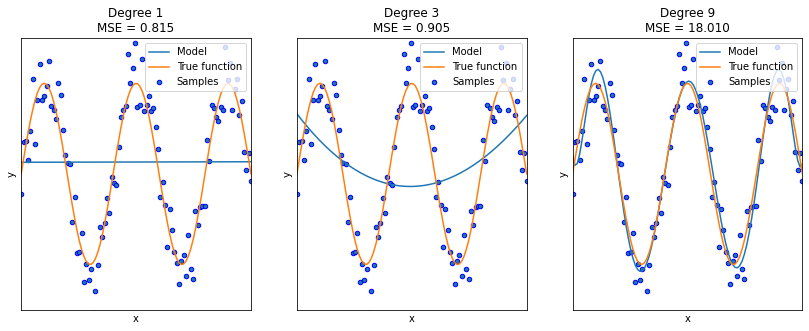

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(5 * np.pi * X)

np.random.seed(123)

n_samples = 100
degrees = [1, 3, 9]

X = np.linspace(0, 1, n_samples) # np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print("Degree=", degrees[i], ", coefficients=", pipeline.steps[1][1].coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.3f}".format(degrees[i], -scores.mean()))

plt.show()

## End